In [1]:
mol_ids = [10003368, 11093, 20209115, 8411, 77235]

In [2]:
import pandas as pd
uma_df = pd.DataFrame()
uma_df["mol_id"] = mol_ids
uma_df["r2scan_rmsd"] = None
uma_df["b3lyp_rmsd"] = None
uma_df["aimnet_rmsd"] = None
uma_df["xTB_rmsd"] = None

uma_df.head()

,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd
0,10003368,None,None,None,None
1,11093,None,None,None,None
2,20209115,None,None,None,None
3,8411,None,None,None,None
4,77235,None,None,None,None


In [3]:
#testing r2scan

from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

r2_directory = "/home/aweiland/comparing_theories/r2scan-3c/final_run/all_xyz"
uma_directory = "/home/aweiland/comparing_theories/uma_egret/r2scan/r2_xyz_files"

for num in mol_ids:
    
    xtb_path = os.path.join(r2_directory, "r2_r2_" + str(num) + ".xyz")
    
    dft_file = "uma_" + str(num) + ".xyz"
    dft_path = os.path.join(uma_directory, dft_file)
    
    try:
        xtb_mol = mda.Universe(xtb_path)
    except EOFError:
        print(file)
        continue
        
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == num, 'r2scan_rmsd'] = value
    
    
uma_df.head()



/home/aweiland/.conda/envs/egret-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd
0,10003368,0.011772,None,None,None
1,11093,0.006265,None,None,None
2,20209115,0.026818,None,None,None
3,8411,0.006065,None,None,None
4,77235,0.012936,None,None,None


In [4]:
#testing b3lyp

from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

b3_directory = "/home/aweiland/comparing_theories/DFT/B3LYP/final_run/xyz_files"
uma_directory = "/home/aweiland/comparing_theories/uma_egret/b3lyp/b3lyp_xyz_files"

for num in mol_ids:
    
    xtb_path = os.path.join(b3_directory, "B3LYP_" + str(num) + ".xyz")
    
    dft_file = "uma_" + str(num) + ".xyz"
    dft_path = os.path.join(uma_directory, dft_file)
    
    try:
        xtb_mol = mda.Universe(xtb_path)
    except EOFError:
        print(file)
        continue
        
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == num, 'b3lyp_rmsd'] = value
    
    
uma_df.head()



,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd
0,10003368,0.011772,0.009928,None,None
1,11093,0.006265,0.008298,None,None
2,20209115,0.026818,0.008349,None,None
3,8411,0.006065,0.002686,None,None
4,77235,0.012936,0.005966,None,None


In [5]:
#testing aimnet

from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

aimnet_directory = "/home/aweiland/comparing_theories/aimnet/aimnet_xyz_files"
uma_directory = "/home/aweiland/comparing_theories/uma_egret/aimnet/aimnet_xyz_files"

for num in mol_ids:
    
    xtb_path = os.path.join(aimnet_directory, "aimnet_" + str(num) + ".xyz")
    
    dft_file = "uma_" + str(num) + ".xyz"
    dft_path = os.path.join(uma_directory, dft_file)
    
  
    xtb_mol = mda.Universe(xtb_path)

    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == num, 'aimnet_rmsd'] = value
    
    
uma_df.head()



,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd
0,10003368,0.011772,0.009928,0.017853,None
1,11093,0.006265,0.008298,0.020628,None
2,20209115,0.026818,0.008349,0.011322,None
3,8411,0.006065,0.002686,0.008751,None
4,77235,0.012936,0.005966,0.007216,None


In [6]:
#testing xTB

from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

xtb_directory = "/home/aweiland/comparing_theories/xTB/final_run/all_xyz"
uma_directory = "/home/aweiland/comparing_theories/uma_egret/xTB/xtb_xyz_files"

for num in mol_ids:
    
    xtb_path = os.path.join(xtb_directory, "xtb_" + str(num) + ".xyz")
    
    dft_file = "uma_" + str(num) + ".xyz"
    dft_path = os.path.join(uma_directory, dft_file)
    
    try:
        xtb_mol = mda.Universe(xtb_path)
    except FileNotFoundError:
        print(num)
        continue
        
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == num, 'xtb_rmsd'] = value
    
    
uma_df.head()



10003368


,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd,xtb_rmsd
0,10003368,0.011772,0.009928,0.017853,None,NaN
1,11093,0.006265,0.008298,0.020628,None,0.013280
2,20209115,0.026818,0.008349,0.011322,None,0.110445
3,8411,0.006065,0.002686,0.008751,None,0.055156
4,77235,0.012936,0.005966,0.007216,None,0.041913


In [7]:
uma_df["MO6_rmsd"] = None


In [8]:
#M06 rmsd
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

uma_directory = "/home/aweiland/comparing_theories/UMA/final_uma/uma_xyz"
dft_directory = "/home/aweiland/comparing_theories/dft_geometries/dft_xyz_files"


for mol_id in mol_ids:

    
    xtb_path = os.path.join(uma_directory, "uma_" + str(mol_id) + ".xyz")
    
    dft_file = "dft_" + str(mol_id) + ".xyz"
    dft_path = os.path.join(dft_directory, dft_file)
    
    xtb_mol = mda.Universe(xtb_path)
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == mol_id, 'MO6_rmsd'] = value
    
    
uma_df.head()

,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd,xtb_rmsd,MO6_rmsd
0,10003368,0.011772,0.009928,0.017853,None,NaN,0.001672
1,11093,0.006265,0.008298,0.020628,None,0.013280,0.000765
2,20209115,0.026818,0.008349,0.011322,None,0.110445,0.007375
3,8411,0.006065,0.002686,0.008751,None,0.055156,0.002036
4,77235,0.012936,0.005966,0.007216,None,0.041913,0.000661


In [20]:
mean = uma_df[["xtb_rmsd", "aimnet_rmsd", "r2scan_rmsd", "b3lyp_rmsd", "MO6_rmsd"]].mean()

mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]


label_map = {
    'xtb_rmsd': 'xTB',
    'aimnet_rmsd': 'AIMNET-2',
    "r2scan_rmsd": "r2scan-3c",
    "b3lyp_rmsd": "B3LYP/def2-TZVP",
    "MO6_rmsd": "MO6-2X/def2-TZVP"
    
}
mean_df['theory'] = mean_df['theory'].map(label_map)


/scratch/aweiland/job_41556814/ipykernel_3203766/2659953911.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_df_sorted, x="theory", y="mean_value", palette=colors[:len(mean_df_sorted)], edgecolor=".2")


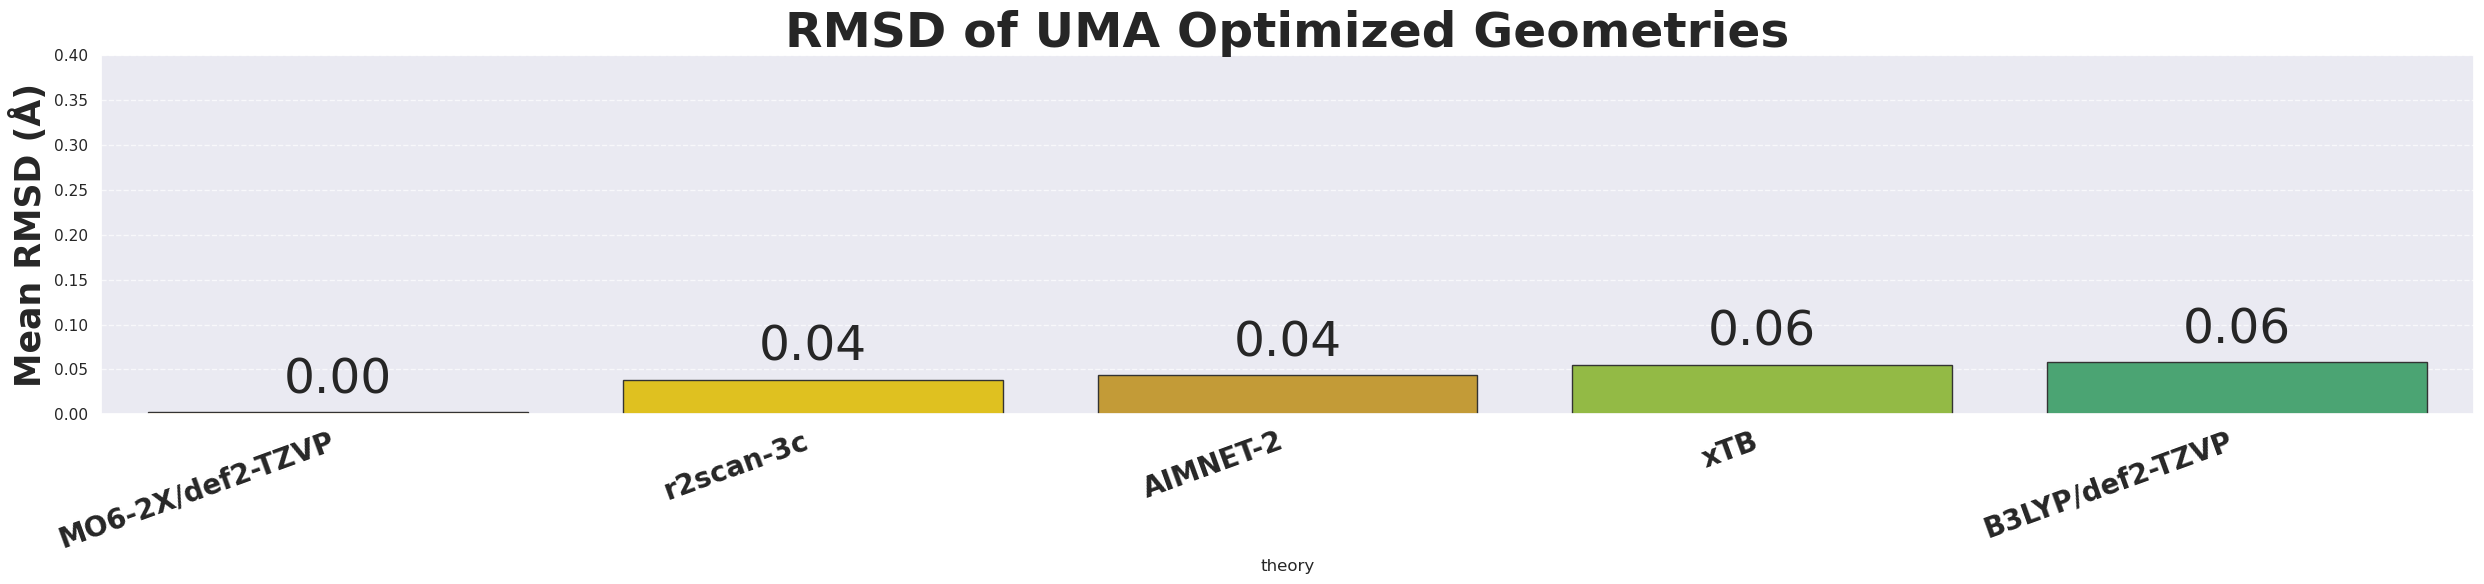

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["orange", "gold", "goldenrod", "yellowgreen", "mediumseagreen"]

mean_df_sorted = mean_df.sort_values("mean_value", ascending=True)

plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")

ax = sns.barplot(data=mean_df_sorted, x="theory", y="mean_value", palette=colors[:len(mean_df_sorted)], edgecolor=".2")

plt.ylabel("Mean RMSD (Å)", fontsize=25, weight='bold')
plt.title("RMSD of UMA Optimized Geometries", fontsize=35, weight='bold')
plt.xticks(rotation=20, ha='right', fontsize=20, weight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 0.4)
# Add value labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height:.2f}',
            ha='center', va='bottom', fontsize=35)

plt.tight_layout()
plt.show()


In [11]:
#r2scan rmsd
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

uma_directory = "/home/aweiland/comparing_theories/uma_egret/r2scan/r2_xyz_files"
dft_directory = "/home/aweiland/comparing_theories/dft_geometries/dft_xyz_files"


for mol_id in mol_ids:

    
    xtb_path = os.path.join(uma_directory, "uma_" + str(mol_id) + ".xyz")
    
    dft_file = "dft_" + str(mol_id) + ".xyz"
    dft_path = os.path.join(dft_directory, dft_file)
    
    xtb_mol = mda.Universe(xtb_path)
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == mol_id, 'r2scan_rmsd'] = value
    
    
uma_df.head()

,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd,xtb_rmsd,MO6_rmsd
0,10003368,0.029803,0.009928,0.017853,None,NaN,0.001672
1,11093,0.054018,0.008298,0.020628,None,0.013280,0.000765
2,20209115,0.042625,0.008349,0.011322,None,0.110445,0.007375
3,8411,0.02777,0.002686,0.008751,None,0.055156,0.002036
4,77235,0.037348,0.005966,0.007216,None,0.041913,0.000661


In [12]:
#aimnet rmsd
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

uma_directory = "/home/aweiland/comparing_theories/uma_egret/aimnet/aimnet_xyz_files"
dft_directory = "/home/aweiland/comparing_theories/dft_geometries/dft_xyz_files"


for mol_id in mol_ids:

    
    xtb_path = os.path.join(uma_directory, "uma_" + str(mol_id) + ".xyz")
    
    dft_file = "dft_" + str(mol_id) + ".xyz"
    dft_path = os.path.join(dft_directory, dft_file)
    
    xtb_mol = mda.Universe(xtb_path)
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == mol_id, 'aimnet_rmsd'] = value
    
    
uma_df.head()

,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd,xtb_rmsd,MO6_rmsd
0,10003368,0.029803,0.009928,0.112023,None,NaN,0.001672
1,11093,0.054018,0.008298,0.03528,None,0.013280,0.000765
2,20209115,0.042625,0.008349,0.03697,None,0.110445,0.007375
3,8411,0.02777,0.002686,0.019016,None,0.055156,0.002036
4,77235,0.037348,0.005966,0.013904,None,0.041913,0.000661


In [13]:
#b3lyp rmsd
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

uma_directory = "/home/aweiland/comparing_theories/uma_egret/b3lyp/b3lyp_xyz_files"
dft_directory = "/home/aweiland/comparing_theories/dft_geometries/dft_xyz_files"


for mol_id in mol_ids:

    
    xtb_path = os.path.join(uma_directory, "uma_" + str(mol_id) + ".xyz")
    
    dft_file = "dft_" + str(mol_id) + ".xyz"
    dft_path = os.path.join(dft_directory, dft_file)
    
    xtb_mol = mda.Universe(xtb_path)
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == mol_id, 'b3lyp_rmsd'] = value
    
    
uma_df.head()

,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd,xtb_rmsd,MO6_rmsd
0,10003368,0.029803,0.038281,0.112023,None,NaN,0.001672
1,11093,0.054018,0.111726,0.03528,None,0.013280,0.000765
2,20209115,0.042625,0.05862,0.03697,None,0.110445,0.007375
3,8411,0.02777,0.033661,0.019016,None,0.055156,0.002036
4,77235,0.037348,0.048886,0.013904,None,0.041913,0.000661


In [14]:
#xtb rmsd
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis as mda
import os

uma_directory = "/home/aweiland/comparing_theories/uma_egret/xTB/xtb_xyz_files"
dft_directory = "/home/aweiland/comparing_theories/dft_geometries/dft_xyz_files"


for mol_id in mol_ids:

    
    xtb_path = os.path.join(uma_directory, "uma_" + str(mol_id) + ".xyz")
    
    dft_file = "dft_" + str(mol_id) + ".xyz"
    dft_path = os.path.join(dft_directory, dft_file)
    
    try:
        xtb_mol = mda.Universe(xtb_path)
    except FileNotFoundError:
        print(mol_id)
        continue
    dft_mol = mda.Universe(dft_path)

    dft_atoms = dft_mol.atoms
    xtb_atoms = xtb_mol.atoms
    
    value = rmsd(dft_atoms.positions, xtb_atoms.positions, center=True, superposition=True)
    
    uma_df.loc[uma_df['mol_id'] == mol_id, 'xTB_rmsd'] = value
    
    
uma_df.head()

10003368


,mol_id,r2scan_rmsd,b3lyp_rmsd,aimnet_rmsd,xTB_rmsd,xtb_rmsd,MO6_rmsd
0,10003368,0.029803,0.038281,0.112023,None,NaN,0.001672
1,11093,0.054018,0.111726,0.03528,0.368138,0.013280,0.000765
2,20209115,0.042625,0.05862,0.03697,0.028862,0.110445,0.007375
3,8411,0.02777,0.033661,0.019016,0.054616,0.055156,0.002036
4,77235,0.037348,0.048886,0.013904,0.075104,0.041913,0.000661


In [15]:
mean = uma_df[["xTB_rmsd", "aimnet_rmsd", "r2scan_rmsd", "b3lyp_rmsd", "MO6_rmsd"]].mean()

mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]


label_map = {
    'xTB_rmsd': 'xTB',
    'aimnet_rmsd': 'AIMNET',
    "r2scan_rmsd": "r2scan-3c",
    "b3lyp_rmsd": "B3LYP/def2-TZVP",
    "MO6_rmsd": "MO6-2X"
    
}
mean_df['theory'] = mean_df['theory'].map(label_map)


/scratch/aweiland/job_41556814/ipykernel_3203766/1419701393.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_df_sorted, x="theory", y="mean_value", palette="muted", edgecolor=".2")


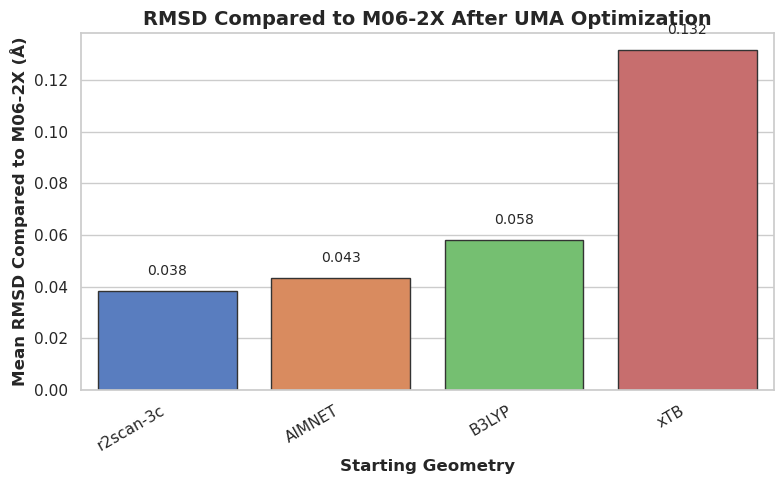

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute mean RMSD values
mean = uma_df[["xTB_rmsd", "aimnet_rmsd", "r2scan_rmsd", "b3lyp_rmsd"]].mean()
mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]

# Rename theory names
label_map = {
    'xTB_rmsd': 'xTB',
    'aimnet_rmsd': 'AIMNET',
    "r2scan_rmsd": "r2scan-3c",
    "b3lyp_rmsd": "B3LYP"
}
mean_df['theory'] = mean_df['theory'].map(label_map)

# Sort by mean 
mean_df_sorted = mean_df.sort_values("mean_value", ascending=True)

# Create bar plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(data=mean_df_sorted, x="theory", y="mean_value", palette="muted", edgecolor=".2")

# Add value labels manually
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,  # adjust offset as needed
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Labels and formatting
plt.xlabel("Starting Geometry", fontsize=12, weight='bold')
plt.ylabel("Mean RMSD Compared to M06-2X (Å)", fontsize=12, weight='bold')
plt.title("RMSD Compared to M06-2X After UMA Optimization", fontsize=14, weight='bold')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()
